In [60]:
import numpy as np
import matplotlib.pyplot as plt

# 예
x = np.array([-10,10,0,1])
y = 1 / (1 + np.exp(-x))


In [4]:
# cost 함수

# 사용할 데이터
# 공부시간 어학연수기간 시험성적
#    1          1          Fail (0)
#    2          0          Fail (0)
#    5          1          Fail (0)
#    2          3          Pass (1)
#    3          3          Pass (1)
#    8          1          Pass (1)
#    10         0          Pass (1)

In [14]:
import tensorflow as tf

# training data set
x_data = [[1,1],
         [2,0],
         [5,1],
         [2,3],
         [3,3],
         [8,1],
         [10,0]]
y_data = [[0],[0],[0],[1],[1],[1],[1]]


# placeholder
X = tf.placeholder(shape=[None,2],dtype=tf.float32)
Y = tf.placeholder(shape=[None,1],dtype=tf.float32)


# Weight, bias
W = tf.Variable(tf.random_normal([2,1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')


# Hypothesis
# 기존에 H라고 하던 가설을, 시그모이드를 이용해서 곡선의
# 가설을 잡을 때, logit이라고 표현한다.
logit= tf.matmul(X,W) + b
H = tf.sigmoid(logit) # sigmoid를 이용해서 곡선으로표현


# cost function 일반적으로 tf에서 제공하는 함수를 이용
# 앞 부분은 같지만 가설, cost function이 변경된다.
# 안에 두개의 인자가 들어간다.
# logits=, labels=
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels=Y))
# log 함수가 들어가 잇기 때문에 그래프가 매끈하게 펴진다.
# 이를 미분함으로써(최소제곱법이용함으로써) 최솟값을 찾을 수 있게 된다. 


# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1 )
train = optimizer.minimize(cost)


# Session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# 학습
for step in range(3000):
    _, cost_val = sess.run([train, cost], feed_dict={X: x_data,
                                                     Y: y_data})
    if step % 300 == 0:
        print(f'cost값은:{cost_val}')
        

# prediction
result = sess.run(H, feed_dict={X: [[4,1]] })
print(result) #시험에 통과했어요!

if result > 0.5:
    print(f'시험에 통과: {result}')
else:
    print(f'시험에 떨어짐: {result}')

cost값은:1.894262433052063
cost값은:0.36012598872184753
cost값은:0.2540614902973175
cost값은:0.21127891540527344
cost값은:0.1861618608236313
cost값은:0.16863754391670227
cost값은:0.15521176159381866
cost값은:0.1443301886320114
cost값은:0.13518328964710236
cost값은:0.1273004114627838
[[0.18584761]]
시험에 떨어짐: [[0.18584761]]


### 대학원 입학 시험 예측 해보기

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


상관계수:          admit       gre       gpa      rank
admit  1.000000  0.184434  0.178212 -0.242513
gre    0.184434  1.000000  0.384266 -0.123447
gpa    0.178212  0.384266  1.000000 -0.057461
rank  -0.242513 -0.123447 -0.057461  1.000000


,admit,gre,gpa,rank
0,0,380,3.61,2
1,1,660,3.67,2
2,1,800,4.00,4
3,1,640,3.19,1
4,0,520,2.93,1
...,...,...,...,...
395,0,620,4.00,3
396,0,560,3.04,2
397,0,460,2.63,3
398,0,700,3.65,3


,admit,gre,gpa,rank
0,0,380,3.61,2
1,1,660,3.67,2
2,1,800,4.00,4
3,1,640,3.19,1
4,0,520,2.93,1
...,...,...,...,...
395,0,620,4.00,3
396,0,560,3.04,2
397,0,460,2.63,3
398,0,700,3.65,3


cost값은:0.6924879550933838
cost값은:0.5829955339431763
cost값은:0.5774873495101929
[[1.]]
정확도:0.701265811920166


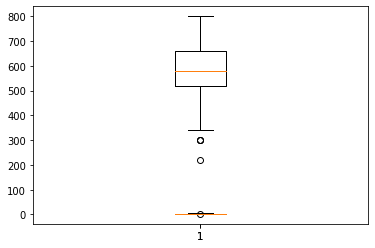

In [58]:
# admission 데이터 자료 사용하기
# logistic regression을 수행한 후 prediction을 진행

# moduleimport 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


# data set
df = pd.read_csv("C:/Users/student/Desktop/머신러닝/admission.csv")
display(df)

# 데이터가 어떤 관계가 있는지 확인하는작업도 사실상 필요함
# 데이터 프레임에 대해 상관계수 구하기
print(f'상관계수:{df.corr()}')
# 확인해본 결과, gre, gpa는 admit과 양의 상관관계를 보이지만,
# rank는 음의 상관관계를 보인다.
# gpa, gre 올라가면 합격, rank가 올라가면 불합격
# 따라서 rank를 역순으로 돌려줘야 함
# df 이용하면 간단하게 작업 가능

def change_rank(x):
    if x == 4:
        return 1
    elif x == 3:
        return 2
    elif x == 2:
        return 3
    else:
        return 4
        
df["rank"] = df["rank"].apply(lambda x: change_rank(x))
display(df)




# data pre processing
# 결측치
df = df.dropna(how="any", inplace=False)


# 이상치
'''
def process_outlier(tmp_df, tmp):
q1, q3 = np.percentile(tmp, [25,75])
iqr = q3-q1
lower = q1 - iqr*1.5
upper = q3 + iqr*1.5
upper_mask = tmp >upper
lower_mask = tmp <lower

이렇게 함수로 만들어서 쓰면 굳이 여러번 작성하지 않고 다음 식으로 가능
df = process_outlier(df,df["gre"])
df = process_outlier(df,df["gpa"])
'''



plt.boxplot(df["gre"]) # 이상치 (하)
gre_q1, gre_q3 = np.percentile(df['gre'],[25,75])
gre_lower = gre_q1 - (gre_q3-gre_q1) *1.5
gre_mask = df['gre'] < gre_lower
df = df.loc[~gre_mask]

plt.boxplot(df["gpa"]) # 이상치 (하)
gpa_q1, gpa_q3 = np.percentile(df['gpa'],[25,75])
gpa_lower = gpa_q1 - (gpa_q3-gpa_q1) *1.5
gpa_mask = df['gpa'] < gpa_lower
df = df.loc[~gpa_mask]
display(df)

# plt.boxplot(df["rank"]) # 없음
# plt.boxplot(df["admit"]) # 없음


# training data set, 표준화
x_data = df[["gre","gpa","rank"]]
x_data = MinMaxScaler().fit_transform(x_data)
y_data = df[["admit"]]
y_data = MinMaxScaler().fit_transform(y_data)
# y_data = df[["admit"]].values.reshape(-1,1)

# placeholder
X = tf.placeholder(shape=[None, 3], dtype=tf.float32)
Y = tf.placeholder(shape=[None, 1], dtype=tf.float32)


# Weight, bias
W = tf.Variable(tf.random_normal([3,1]), name="weight")
b = tf.Variable(tf.random_normal([1]), name="bias")


# Hypothesis
logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)


# cost
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logit, labels=Y))


# train
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)


# sess, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())


# learning
for step in range(30000):
    _, cost_val = sess.run([train, cost], feed_dict = {X: x_data,
                                                       Y: y_data})
    if step % 10000 == 0:
        print(f'cost값은:{cost_val}')
        
# prediction
result = sess.run(H, feed_dict = {X: [[380, 3.61, 2]] })
print(result)


# logistic 부터는 반드시! 내가 한 machine learning model이 잘 맞는지 확인해야함!!
# 정확도 측정
# test data set이 없어요 ㅜㅜ train data set을 test data set으로 사용한다.

# predict한 결과를 알아와요!
# 특정한 x값을 training data set으로 이동
# cast: 바꾼다, True 및 False 값을 실수로 바꾼다 : 0,1
# 특정한 x 입력에 대해서 1과 0으로 만들어진 예측값 
# 예측한 값이 원본 데이터과 값이 같을수록 정확도가 높은 것: correct
predict = tf.cast( H>0.5, dtype=tf.float32 ) 
correct= tf.equal(predict, Y) # 이 논릳값을 다시 실수로 바꿈
# correct = tf.cast( correct, dtype=tf.float32 ) # 이 값으로 평균을 내면 accuracy
accuracy = tf.reduce_mean(tf.cast( correct, dtype=tf.float32 ))
print(f'정확도:{sess.run(accuracy, feed_dict={X:x_data,Y:y_data})}')


# 정확도 측정했을때, 최소 95%이상, 일반적으로 98% 이상은 나와야 실생활 응용가능
# accuracy
             
# 모델의 정확도가 70%이면 사용할 수 없는 모델
# training data set의 70%를 학습에 이용
# training data set의 30%를 평가에 이용

In [49]:
## 위의 과정을 한번에 실행할 수 있는  모듈

from sklearn.linear_model import LogisticRegression